In [2]:
%cd yolov5

c:\Users\HYPERPC\Desktop\CarPlateRecognition\yolov5


In [ ]:
!echo "train: Dataset/train/images" > data/alpr.yaml
!echo "val:   Dataset/train/images" >> data/alpr.yaml

!echo "nc : 1" >> data/alpr.yaml
!echo "names: ['license']" >> data/alpr.yaml

!cat data/alpr.yaml

train: Dataset/train/images
val:   Dataset/train/images
nc : 1
names: ['license']


In [ ]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

FILE_ROOT = "/content/drive/MyDrive/archive/"
IMAGE_PATH = FILE_ROOT + "images"
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "Dataset/"
DEST_IMAGES_PATH = "train/images"
DEST_LABELS_PATH = "train/labels"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p Dataset/train/labels

In [ ]:
!mkdir -p Dataset/train
!cp -rf /content/drive/MyDrive/archive/images Dataset/train

In [ ]:
!mkdir -p Dataset/val
!cp -rf /content/drive/MyDrive/archive/images/Cars1*.png Dataset/val

In [ ]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

def save_file(img_jpg_file_name, size, img_box):
    classes = ['license']
    save_file_name = DATA_ROOT + DEST_LABELS_PATH + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:
        #cls_num = classes.index(box[0]) # find class_id
        cls_num = 0
        new_box = cord_converter(size, box[1:]) # convert box coord into YOLO x,y,w,h

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()

def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)
    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_file(img_xml_file, [img_w, img_h], img_box)

In [ ]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  Cars0.xml
/content/drive/MyDrive/archive/annotations/Cars0.xml
box:(c,xmin,ymin,xmax,ymax) licence 226 125 419 173
Dataset/train/labels/Cars0.txt
file name:  Cars1.xml
/content/drive/MyDrive/archive/annotations/Cars1.xml
box:(c,xmin,ymin,xmax,ymax) licence 134 128 262 160
Dataset/train/labels/Cars1.txt
file name:  Cars107.xml
/content/drive/MyDrive/archive/annotations/Cars107.xml
box:(c,xmin,ymin,xmax,ymax) licence 141 113 311 164
Dataset/train/labels/Cars107.txt
file name:  Cars106.xml
/content/drive/MyDrive/archive/annotations/Cars106.xml
box:(c,xmin,ymin,xmax,ymax) licence 138 79 177 92
box:(c,xmin,ymin,xmax,ymax) licence 245 79 270 94
box:(c,xmin,ymin,xmax,ymax) licence 169 202 192 231
box:(c,xmin,ymin,xmax,ymax) licence 225 194 279 217
Dataset/train/labels/Cars106.txt
file name:  Cars100.xml
/content/drive/MyDrive/archive/annotations/Cars100.xml
box:(c,xmin,ymin,xmax,ymax) licence 175 114 214 131
Dataset/train/labels/Cars100.txt
file name:  Cars102.xml
/content/drive/M

In [ ]:
!mkdir -p Dataset/val/labels
!cp -rf Dataset/train/labels/Cars1*.txt Dataset/val/labels

In [ ]:
!ls Dataset/train/labels

Cars0.txt    Cars166.txt  Cars231.txt  Cars298.txt  Cars363.txt  Cars429.txt
Cars100.txt  Cars167.txt  Cars232.txt  Cars299.txt  Cars364.txt  Cars42.txt
Cars101.txt  Cars168.txt  Cars233.txt  Cars29.txt   Cars365.txt  Cars430.txt
Cars102.txt  Cars169.txt  Cars234.txt  Cars2.txt    Cars366.txt  Cars431.txt
Cars103.txt  Cars16.txt   Cars235.txt  Cars300.txt  Cars367.txt  Cars432.txt
Cars104.txt  Cars170.txt  Cars236.txt  Cars301.txt  Cars368.txt  Cars43.txt
Cars105.txt  Cars171.txt  Cars237.txt  Cars302.txt  Cars369.txt  Cars44.txt
Cars106.txt  Cars172.txt  Cars238.txt  Cars303.txt  Cars36.txt	 Cars45.txt
Cars107.txt  Cars173.txt  Cars239.txt  Cars304.txt  Cars370.txt  Cars46.txt
Cars108.txt  Cars174.txt  Cars23.txt   Cars305.txt  Cars371.txt  Cars47.txt
Cars109.txt  Cars175.txt  Cars240.txt  Cars306.txt  Cars372.txt  Cars48.txt
Cars10.txt   Cars176.txt  Cars241.txt  Cars307.txt  Cars373.txt  Cars49.txt
Cars110.txt  Cars177.txt  Cars242.txt  Cars308.txt  Cars374.txt  Cars4.txt
Cars111.tx

In [3]:
!python train.py --img 416 --batch 16 --epochs 500 --data data/alpr.yaml --cfg models/yolov5s.yaml

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/alpr.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2023-8-15 Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.

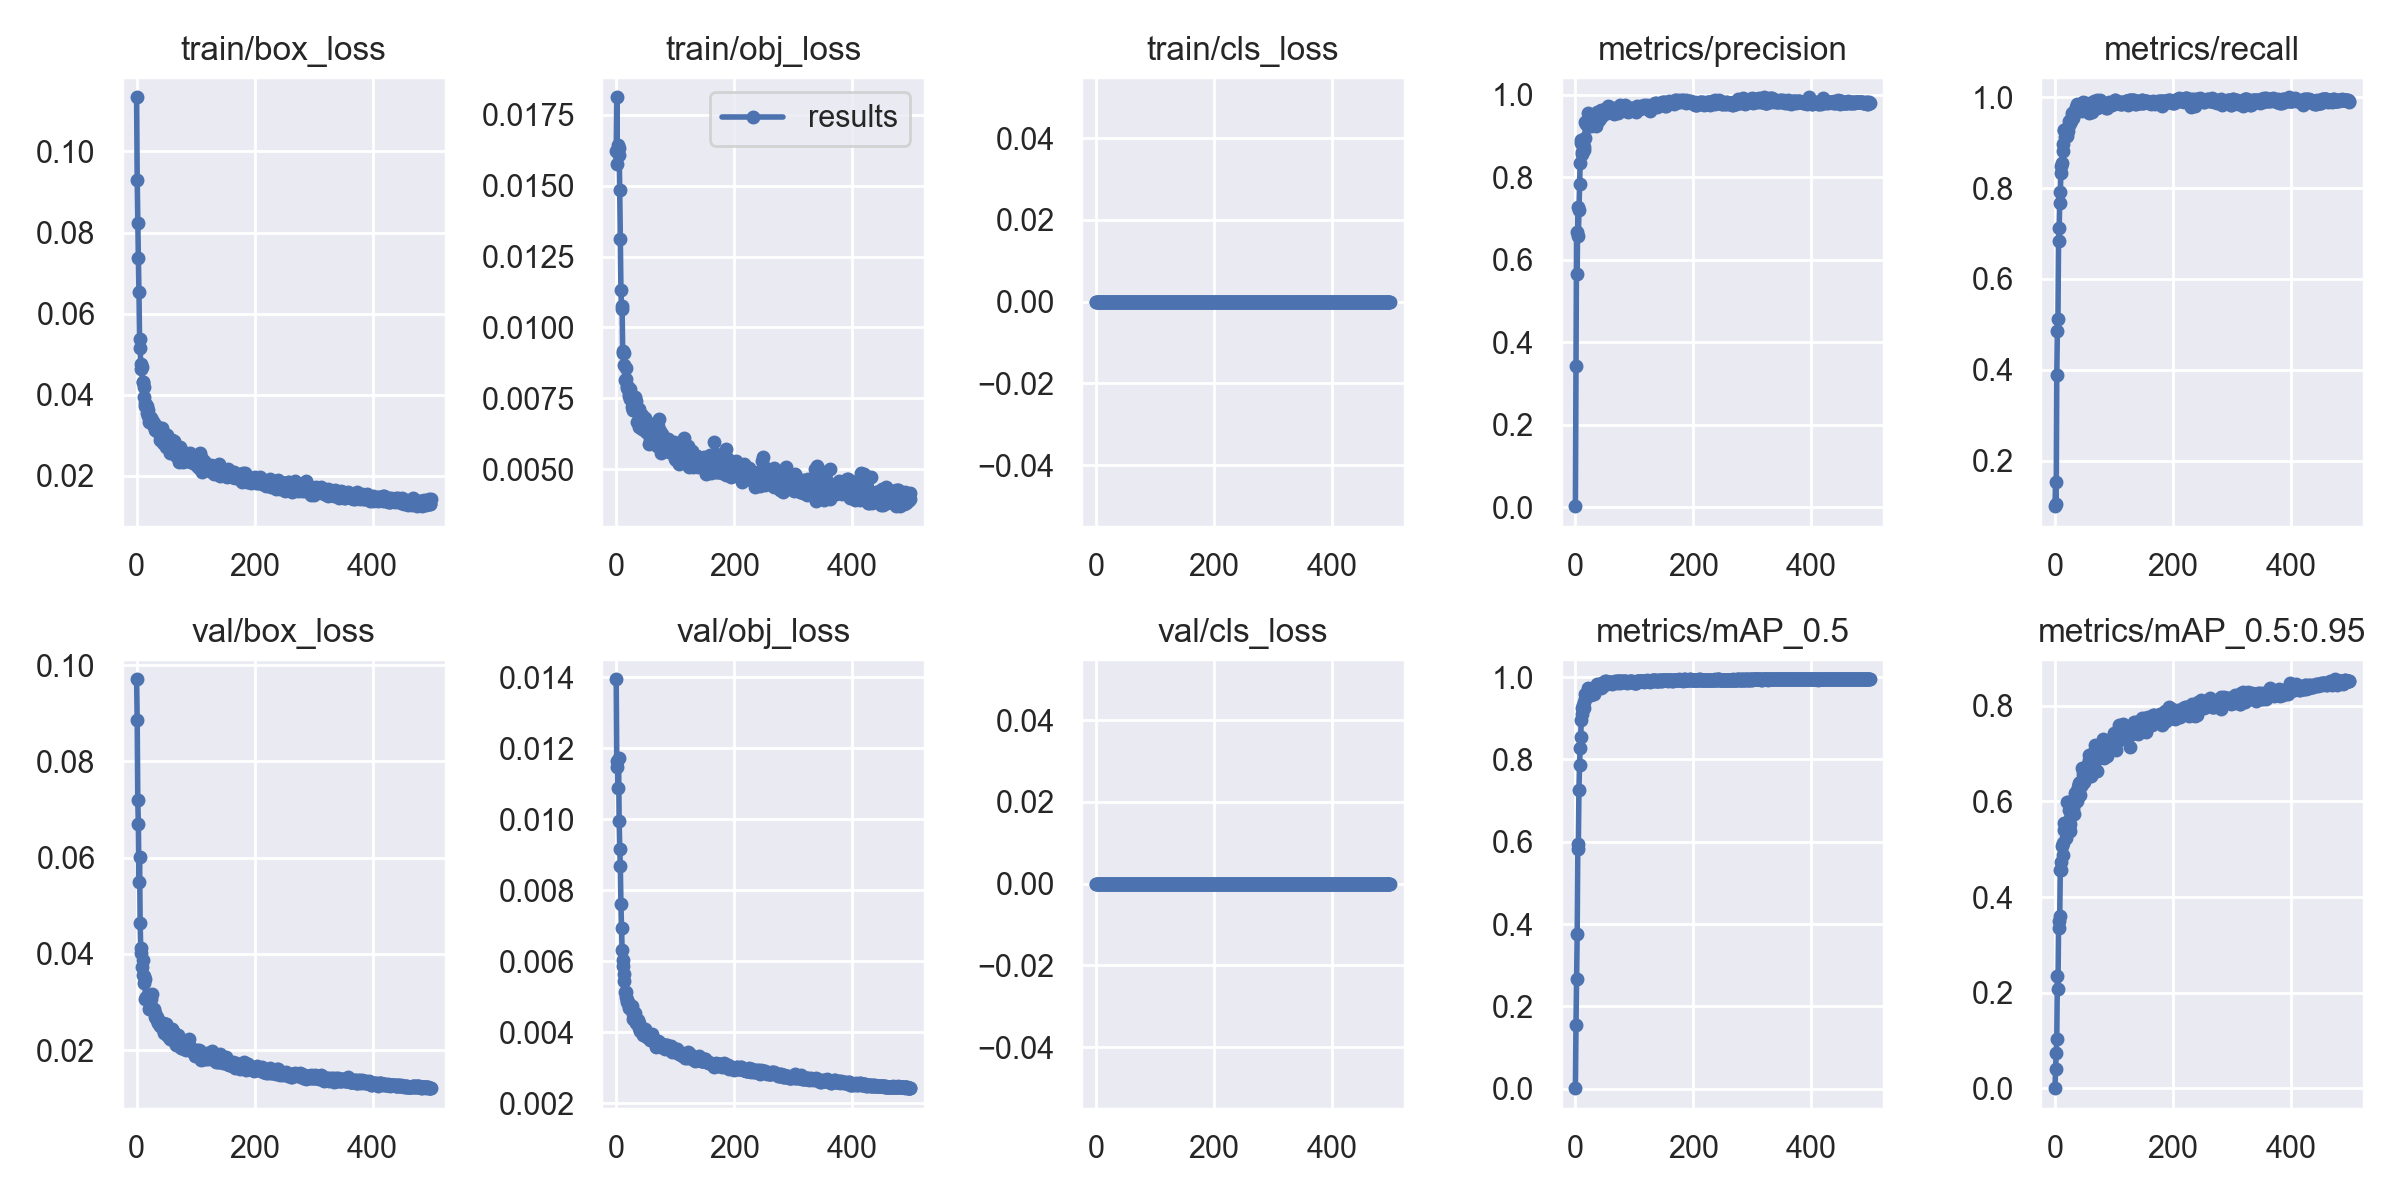

In [5]:
from IPython.display import Image
Image('runs/train/exp6/results.png')

In [6]:
!python detect.py --source car/ --conf 0.6 --weights runs/train/exp2/weights/best.pt --save-txt

detect: weights=['runs/train/exp2/weights/best.pt'], source=car/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2023-8-15 Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/9 C:\Users\HYPERPC\Desktop\CarPlateRecognition\yolov5\car\car.jpeg: 640x640 1 license, Done. (0.004s)
image 2/9 C:\Users\HYPERPC\Desktop\CarPlateRecognition\yolov5\car\car2.jpg: 480x640 1 license, Done. (0.050s)
image 3/9 C:\Users\HYPERPC\Desktop\CarPlateRecognition\yolov5\car\car3.webp: 352x640 1 license, Done. (0.049s)
image 4/9 C:\Users\HYPERPC\Desktop\Car

In [7]:
from IPython.display import Image

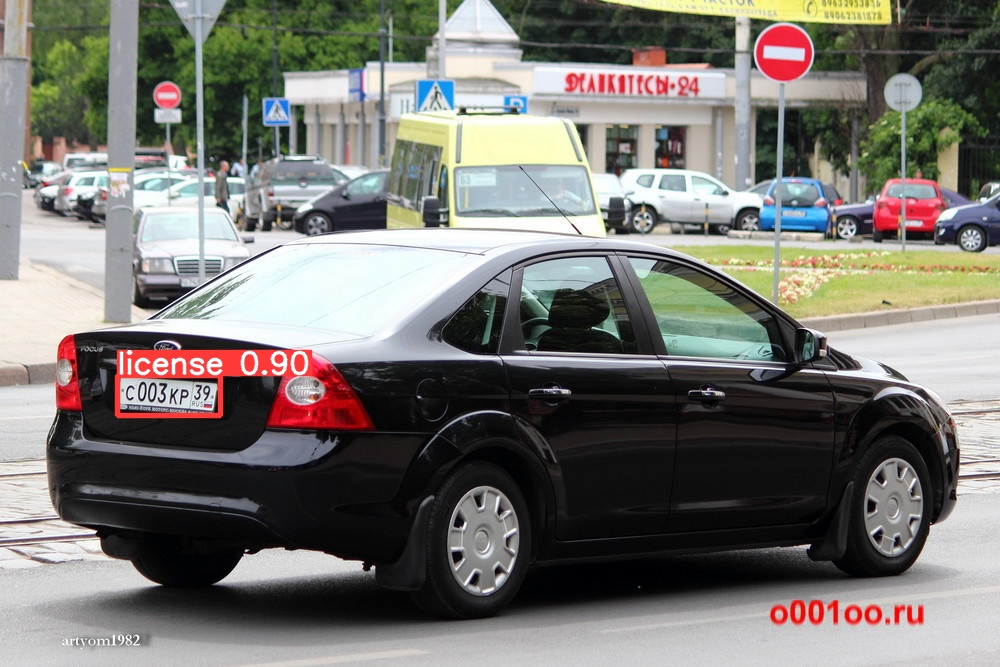

In [20]:
Image('runs/detect/exp3/car4.jpeg')

In [21]:
def read_txt(filepath, size):
    f = open(filepath, 'r')
    lines = f.readlines()
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [float(i) for i in line.split(' ')]
        obj[0] = int(obj[0])
        obj[1] = int(obj[1] * size[1])
        obj[2] = int(obj[2] * size[0])
        obj[3] = int(obj[3] * size[1])
        obj[4] = int(obj[4] * size[0])
        objects.append(obj)
    return objects

In [22]:
DETECT_PATH = 'runs/detect/exp3/'
IMG_NAME    = 'car4'

168 395 103 39
(667, 1000, 3)
376 414 117 219


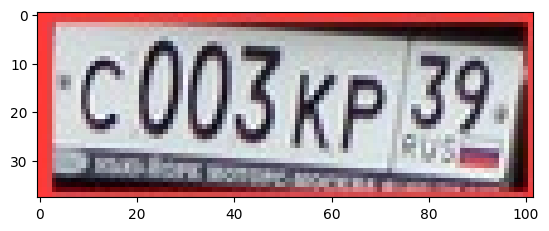

In [23]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(DETECT_PATH+IMG_NAME+'.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lics = read_txt(DETECT_PATH +'labels/'+IMG_NAME+'.txt', img.shape)
i = 0

for lic in lics:
    i += 1
    c, x, y, w, h = lic
    print(x,y,w,h)
    print(img.shape)
    print(y-int(h/2), y+int(h/2), x-int(w/2), x+int(w/2))
    img_alpr = img[y-int(h/2):y+int(h/2),x-int(w/2):x+int(w/2)]
    cv2.imwrite(f"result/out{i}.jpeg", img_alpr)
    plt.imshow(img_alpr)
    plt.show()

Rotation: 4.00 degrees


c:\Users\HYPERPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


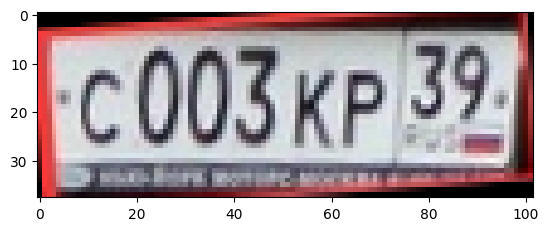

In [24]:
import numpy as np
import cv2

from skimage.transform import radon

filename = 'result/out1.jpeg'
img = cv2.imread(filename)
I = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = I.shape
if (w > 640):
    I = cv2.resize(I, (640, int((h / w) * 640)))
I = I - np.mean(I)
sinogram = radon(I)
r = np.array([np.sqrt(np.mean(np.abs(line) ** 2)) for line in sinogram.transpose()])
rotation = np.argmax(r)
print('Rotation: {:.2f} degrees'.format(90 - rotation))
M = cv2.getRotationMatrix2D((w/2, h/2), 90 - rotation, 1)
dst = cv2.warpAffine(img, M, (w, h))
cv2.imwrite('rotated.jpg', dst)
plt.imshow(dst)
plt.show()


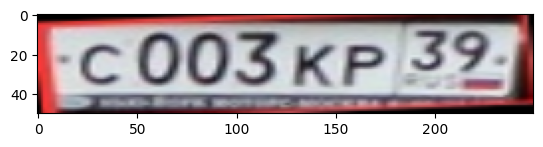

In [25]:
plate = cv2.resize(dst, (250, 50))
plt.imshow(plate)
plt.show()

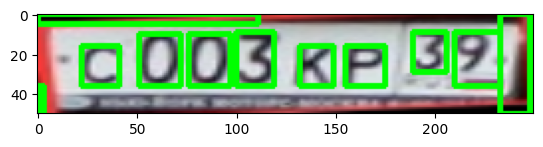

~ 0 45 111 50 0
i 0 0 3 14 0
c 22 14 41 34 0
O 51 14 72 40 0
0 76 14 97 40 0
3 100 14 119 41 0
K 132 14 149 34 0
P 155 14 175 34 0
3 189 21 206 41 0
9 210 14 233 41 0
] 233 0 248 50 0

ic O03 KP 39]



In [26]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
img = plate
h, w, _ = img.shape

boxes = pytesseract.image_to_boxes(img)
text = pytesseract.image_to_string(img)

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

plt.imshow(img)
plt.show()
print(boxes)
print(text)

In [27]:
text

'ic O03 KP 39]\n'

In [28]:
ascii_letters_and_num = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
final_text = ''
for i in text:
    if i in ascii_letters_and_num:
        final_text += i
print(final_text)

icO03KP39
